# **Klasifikasi berbasis Multiclass Classification pada Data Tweet tentang Mobil menggunakan LSTM**

# **Import Data**

In [1]:
import pandas as pd

In [2]:
# Mengunduh file dari GitHub
!wget -O data-tweets-bm.csv https://raw.githubusercontent.com/PuputHanifah/UAS_DEEP_LEARNING/main/data-tweets-bm.csv
df = pd.read_csv('data-tweets-bm.csv')
# Menampilkan beberapa baris pertama dari DataFrame
df.head(10)


--2024-07-20 16:25:57--  https://raw.githubusercontent.com/PuputHanifah/UAS_DEEP_LEARNING/main/data-tweets-bm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 895855 (875K) [text/plain]
Saving to: ‘data-tweets-bm.csv’

data-tweets-bm.csv  100%[===================>] 874.86K  --.-KB/s    in 0.03s   

2024-07-20 16:25:58 (26.7 MB/s) - ‘data-tweets-bm.csv’ saved [895855/895855]



,id_,created_at,tweetID,tweet,username,id_str,name,entity,likes,retweets,quotes,replies,sentiment,Topic Classification,gender,link,imageUrl
0,1,2023-01-01 13:50:44,1.609548e+18,"Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...",TangselSmkn2,1414792059257380864,SMKN2Tangsel,Daihatsu,NaN,NaN,NaN,1,Netral,Lainnya,NaN,https://twitter.com/TangselSmkn2,https://pbs.twimg.com/profile_images/155974970...
1,2,2023-01-01 11:00:01,1.609505e+18,Shin Tae-yong selaku pelatih kepala Timnas Ind...,PSSI,2363027508,PSSI,Mitsubishi,1837302.0,159.0,24686.0,31,Netral,Lainnya,NaN,https://twitter.com/PSSI/status/16095047120127...,https://pbs.twimg.com/media/FlYVvBCaUAA-LHy.jp...
2,3,2023-01-02 9:41:59,1.609847e+18,SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...,GampongSuzuki,971377286,Gampong Suzuki,Suzuki,140.0,72.0,1510.0,0,Positif,Fitur,NaN,https://twitter.com/GampongSuzuki/status/16098...,https://pbs.twimg.com/media/FldTuxJakAQTrqR.jp...
3,4,2023-01-03 7:19:49,1.610174e+18,Baru saja mengirim foto @ TOYOTA PERINTIS GATS...,toyotamedan_id,732457105,Toyota Medan 082167506001,Toyota,642.0,1.0,757.0,0,Netral,Lainnya,NaN,https://twitter.com/toyotamedan_id/status/1610...,https://pbs.twimg.com/profile_images/147098860...
4,5,2023-01-03 2:29:01,1.610101e+18,DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...,HoldenKlasik,1391235014,Suka Mobil Tua,BMW,154655.0,402.0,96590.0,1,Netral,Iklan,NaN,https://twitter.com/HoldenKlasik/status/161010...,https://pbs.twimg.com/media/Flg6NOsaUAAS5FA.jp...
5,6,2023-01-03 14:44:53,1.610286e+18,Semifinal AFF Mitsubishi Electric Cup 2022 Tim...,Liga1Match23,1432645187348492289,BRI Liga 1 2023/24,Mitsubishi,7627.0,30.0,5000.0,6,Netral,Lainnya,NaN,https://twitter.com/Liga1Match23/status/161028...,https://pbs.twimg.com/media/FljipyWaYAIbj0g.jp...
6,7,2023-01-03 1:59:12,1.610093e+18,"Hari Perlawanan 5 | Selasa, 3 Januari 2023 Kum...",FAM_Malaysia,3191632944,FA Malaysia,Mitsubishi,183527.0,63.0,18353.0,9,Netral,Lainnya,NaN,https://twitter.com/FAM_Malaysia/status/161009...,https://pbs.twimg.com/media/FlgzZqOacAEWoxj.jp...
7,8,2023-01-04 3:57:42,1.610486e+18,"Terima kasih kepada 65,147 orang penyokong yan...",FAM_Malaysia,3191632944,FA Malaysia,Mitsubishi,183618.0,63.0,18371.0,17,Positif,Lainnya,NaN,https://twitter.com/FAM_Malaysia/status/161048...,https://pbs.twimg.com/media/FlmYFgzacAAl9Yt.jp...
8,9,2023-01-04 2:00:06,1.610456e+18,? Pasukan kebangsaan ?? akan bertemu Thailand ...,MFL_MY,3247390147,Malaysian Football League,Mitsubishi,126569.0,44.0,36718.0,3,Positif,Lainnya,NaN,https://twitter.com/MFL_MY/status/161045600230...,https://pbs.twimg.com/media/Fll8LbBaAAAvVQ5.jp...
9,10,2023-01-05 16:12:23,1.611033e+18,For Sale Toyota Crown Lele... Custom 2 pintu.....,HoldenKlasik,1391235014,Suka Mobil Tua,Toyota,154264.0,403.0,96531.0,1,Positif,Iklan,NaN,https://twitter.com/HoldenKlasik/status/161103...,https://pbs.twimg.com/media/FluJ2FiakAAdvjm.jp...


# **Preprocessing**

In [3]:
# Cek Apakah ada nilai NaN
df.isna().sum()

id_                        0
created_at                 0
tweetID                    0
tweet                      0
username                   0
id_str                     0
name                       0
entity                     0
likes                    522
retweets                 522
quotes                   522
replies                    0
sentiment                  0
Topic Classification       0
gender                  2124
link                       0
imageUrl                   5
dtype: int64

In [4]:
# cek duplikat pada variabel tweets
print(f'Jumlah duplikat sebelum : {df["tweet"].duplicated().sum()}')
# hapus duplikat
df.drop_duplicates(subset=["tweet"], inplace=True)
# cek duplikat kembali
print(f'Jumlah duplikat sesudah : {df["tweet"].duplicated().sum()}')

Jumlah duplikat sebelum : 26
Jumlah duplikat sesudah : 0


In [5]:
# Visualisasi dataset yang diperlukan
df_tweet = pd.DataFrame(df['tweet'])
df_tweet.head()

,tweet
0,"Hallo, sobat Nedutase Lepas Sambut Kepala SMK ..."
1,Shin Tae-yong selaku pelatih kepala Timnas Ind...
2,SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...
3,Baru saja mengirim foto @ TOYOTA PERINTIS GATS...
4,DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...


## Cleaning
Membersihkan data teks dari elemen-elemen yang tidak relevan agar analisis menjadi lebih akurat dan efisien. Misalnya, menghapus URL, tag HTML, emoji, username, angka, dan karakter non-alfabet.

In [6]:
# Import modul yang diperlukan
import re
import string
import nltk

In [7]:
def remove_URL(tweet): # Menghapus URL
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', tweet)

def remove_html(tweet): # Menghapus tag HTML
  html = re.compile(r'<.*?>')
  return html.sub(r'', tweet)

def remove_emoji(tweet): # Menghapus emoji
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF"
                          "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', tweet)

def remove_username(tweet): # Menghapus username
    username_pattern = re.compile(r'@\w+')
    return username_pattern.sub(r'', tweet)

def remove_numbers (tweet): # Menghapus angka
  tweet = re.sub(r'\d+', '', tweet)
  return tweet

def remove_symbols (tweet): # Menghapus simbol
  tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
  return tweet

# Visualisasi clean dataset 'tweet'
df_tweet['cleaning'] = df_tweet['tweet'].apply(lambda x: remove_URL(x))
df_tweet['cleaning'] = df_tweet['cleaning'].apply(lambda x: remove_html(x))
df_tweet['cleaning'] = df_tweet['cleaning'].apply(lambda x: remove_emoji(x))
df_tweet['cleaning'] = df_tweet['cleaning'].apply(lambda x: remove_username(x))
df_tweet['cleaning'] = df_tweet['cleaning'].apply(lambda x: remove_symbols(x))
df_tweet['cleaning'] = df_tweet['cleaning'].apply(lambda x: remove_numbers(x))

df_tweet.head(10)

,tweet,cleaning
0,"Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...",Hallo sobat Nedutase Lepas Sambut Kepala SMK N...
1,Shin Tae-yong selaku pelatih kepala Timnas Ind...,Shin Taeyong selaku pelatih kepala Timnas Indo...
2,SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...,SUZUKI XL Jawabannya Tampilan eksterior Suzuk...
3,Baru saja mengirim foto @ TOYOTA PERINTIS GATS...,Baru saja mengirim foto TOYOTA PERINTIS GATSU...
4,DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...,DIJUAL BMW E i Mesin M Plat R Pajak On Bodi mu...
5,Semifinal AFF Mitsubishi Electric Cup 2022 Tim...,Semifinal AFF Mitsubishi Electric Cup Timnas ...
6,"Hari Perlawanan 5 | Selasa, 3 Januari 2023 Kum...",Hari Perlawanan Selasa Januari Kumpulan B ...
7,"Terima kasih kepada 65,147 orang penyokong yan...",Terima kasih kepada orang penyokong yang hadi...
8,? Pasukan kebangsaan ?? akan bertemu Thailand ...,Pasukan kebangsaan akan bertemu Thailand pa...
9,For Sale Toyota Crown Lele... Custom 2 pintu.....,For Sale Toyota Crown Lele Custom pintu Kondi...


## Case Folding
Mengurangi variasi dalam data teks dengan menyamakan semua kata yang sama tetapi dalam huruf besar atau kecil yang berbeda. Contohnya, "AI" dan "ai" akan dianggap sama setelah case folding.

In [8]:
def case_folding(text): # Mengubah huruf yang masih uppercase menjadi lowercase
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

# Visualisasi Perbandingan dataset
df_tweet['case_folding'] = df_tweet['cleaning'].apply(case_folding)

df_tweet.head(10)

,tweet,cleaning,case_folding
0,"Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...",Hallo sobat Nedutase Lepas Sambut Kepala SMK N...,hallo sobat nedutase lepas sambut kepala smk n...
1,Shin Tae-yong selaku pelatih kepala Timnas Ind...,Shin Taeyong selaku pelatih kepala Timnas Indo...,shin taeyong selaku pelatih kepala timnas indo...
2,SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...,SUZUKI XL Jawabannya Tampilan eksterior Suzuk...,suzuki xl jawabannya tampilan eksterior suzuk...
3,Baru saja mengirim foto @ TOYOTA PERINTIS GATS...,Baru saja mengirim foto TOYOTA PERINTIS GATSU...,baru saja mengirim foto toyota perintis gatsu...
4,DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...,DIJUAL BMW E i Mesin M Plat R Pajak On Bodi mu...,dijual bmw e i mesin m plat r pajak on bodi mu...
5,Semifinal AFF Mitsubishi Electric Cup 2022 Tim...,Semifinal AFF Mitsubishi Electric Cup Timnas ...,semifinal aff mitsubishi electric cup timnas ...
6,"Hari Perlawanan 5 | Selasa, 3 Januari 2023 Kum...",Hari Perlawanan Selasa Januari Kumpulan B ...,hari perlawanan selasa januari kumpulan b ...
7,"Terima kasih kepada 65,147 orang penyokong yan...",Terima kasih kepada orang penyokong yang hadi...,terima kasih kepada orang penyokong yang hadi...
8,? Pasukan kebangsaan ?? akan bertemu Thailand ...,Pasukan kebangsaan akan bertemu Thailand pa...,pasukan kebangsaan akan bertemu thailand pa...
9,For Sale Toyota Crown Lele... Custom 2 pintu.....,For Sale Toyota Crown Lele Custom pintu Kondi...,for sale toyota crown lele custom pintu kondi...


## Tokenization
Memudahkan analisis teks dengan memisahkan kata-kata sehingga bisa dianalisis secara individu. Misalnya, kalimat "Saya suka belajar AI" diubah menjadi ["Saya", "suka", "belajar", "AI"].

In [9]:
def tokenize(text):# Fungsi tokenisasi teks
     tokens = text.split()
     return tokens

# Visualisasi Perbandingan dataset
df_tweet['tokenize'] = df_tweet['case_folding'].apply(tokenize)

df_tweet.head(10)

,tweet,cleaning,case_folding,tokenize
0,"Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...",Hallo sobat Nedutase Lepas Sambut Kepala SMK N...,hallo sobat nedutase lepas sambut kepala smk n...,"[hallo, sobat, nedutase, lepas, sambut, kepala..."
1,Shin Tae-yong selaku pelatih kepala Timnas Ind...,Shin Taeyong selaku pelatih kepala Timnas Indo...,shin taeyong selaku pelatih kepala timnas indo...,"[shin, taeyong, selaku, pelatih, kepala, timna..."
2,SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...,SUZUKI XL Jawabannya Tampilan eksterior Suzuk...,suzuki xl jawabannya tampilan eksterior suzuk...,"[suzuki, xl, jawabannya, tampilan, eksterior, ..."
3,Baru saja mengirim foto @ TOYOTA PERINTIS GATS...,Baru saja mengirim foto TOYOTA PERINTIS GATSU...,baru saja mengirim foto toyota perintis gatsu...,"[baru, saja, mengirim, foto, toyota, perintis,..."
4,DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...,DIJUAL BMW E i Mesin M Plat R Pajak On Bodi mu...,dijual bmw e i mesin m plat r pajak on bodi mu...,"[dijual, bmw, e, i, mesin, m, plat, r, pajak, ..."
5,Semifinal AFF Mitsubishi Electric Cup 2022 Tim...,Semifinal AFF Mitsubishi Electric Cup Timnas ...,semifinal aff mitsubishi electric cup timnas ...,"[semifinal, aff, mitsubishi, electric, cup, ti..."
6,"Hari Perlawanan 5 | Selasa, 3 Januari 2023 Kum...",Hari Perlawanan Selasa Januari Kumpulan B ...,hari perlawanan selasa januari kumpulan b ...,"[hari, perlawanan, selasa, januari, kumpulan, ..."
7,"Terima kasih kepada 65,147 orang penyokong yan...",Terima kasih kepada orang penyokong yang hadi...,terima kasih kepada orang penyokong yang hadi...,"[terima, kasih, kepada, orang, penyokong, yang..."
8,? Pasukan kebangsaan ?? akan bertemu Thailand ...,Pasukan kebangsaan akan bertemu Thailand pa...,pasukan kebangsaan akan bertemu thailand pa...,"[pasukan, kebangsaan, akan, bertemu, thailand,..."
9,For Sale Toyota Crown Lele... Custom 2 pintu.....,For Sale Toyota Crown Lele Custom pintu Kondi...,for sale toyota crown lele custom pintu kondi...,"[for, sale, toyota, crown, lele, custom, pintu..."


## Stopword Removal
Menghapus kata-kata yang umum dan sering muncul dalam teks tetapi memiliki sedikit makna penting, seperti "dan", "yang", "di", dll, sehingga mengurangi kompleksitas data dan meningkatkan efisiensi analisis dengan fokus pada kata-kata yang lebih bermakna dan penting. Ini membantu dalam mengurangi noise dalam data.

In [10]:
# Import module yang dibutuhkan
import requests
from nltk.corpus import stopwords
nltk.download('stopwords')

# Menghapus stopwords
def remove_stopwords(tokens):
    # Membaca stopwords standar bahasa Indonesia dari NLTK
    stop_words = set(stopwords.words('indonesian'))

    # Fungsi untuk menambahkan stopwords dari URL mentah GitHub
    def add_stopwords_from_url(url):
        response = requests.get(url)
        extra_stopwords = response.text.splitlines()
        stop_words.update(extra_stopwords)

    url = 'https://raw.githubusercontent.com/PuputHanifah/UAS_DEEP_LEARNING/main/id.stopwords.txt'

    # Tambahkan stopwords dari URL mentah
    add_stopwords_from_url(url)

    # Menghapus stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Visualisasi perbandingan dataset
df_tweet['stopword_removal'] = df_tweet['tokenize'].apply(remove_stopwords)
df_tweet.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,tweet,cleaning,case_folding,tokenize,stopword_removal
0,"Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...",Hallo sobat Nedutase Lepas Sambut Kepala SMK N...,hallo sobat nedutase lepas sambut kepala smk n...,"[hallo, sobat, nedutase, lepas, sambut, kepala...","[hallo, sobat, nedutase, lepas, sambut, kepala..."
1,Shin Tae-yong selaku pelatih kepala Timnas Ind...,Shin Taeyong selaku pelatih kepala Timnas Indo...,shin taeyong selaku pelatih kepala timnas indo...,"[shin, taeyong, selaku, pelatih, kepala, timna...","[shin, taeyong, pelatih, kepala, timnas, indon..."
2,SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...,SUZUKI XL Jawabannya Tampilan eksterior Suzuk...,suzuki xl jawabannya tampilan eksterior suzuk...,"[suzuki, xl, jawabannya, tampilan, eksterior, ...","[suzuki, xl, jawabannya, tampilan, eksterior, ..."
3,Baru saja mengirim foto @ TOYOTA PERINTIS GATS...,Baru saja mengirim foto TOYOTA PERINTIS GATSU...,baru saja mengirim foto toyota perintis gatsu...,"[baru, saja, mengirim, foto, toyota, perintis,...","[mengirim, foto, toyota, perintis, gatsu, meda..."
4,DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...,DIJUAL BMW E i Mesin M Plat R Pajak On Bodi mu...,dijual bmw e i mesin m plat r pajak on bodi mu...,"[dijual, bmw, e, i, mesin, m, plat, r, pajak, ...","[dijual, bmw, e, i, mesin, m, plat, r, pajak, ..."


## Stemming
Mengurangi variasi dalam data teks dengan menyamakan kata-kata yang memiliki bentuk dasar yang sama. Misalnya, "berlari", "lari", dan "berlarian" diubah menjadi "lari". Ini membantu dalam menyederhanakan analisis teks dengan mengelompokkan kata-kata yang memiliki makna yang sama.

In [11]:
# Install dan Import modul yang diperlukan
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


In [12]:
factory = StemmerFactory()           # Membuat instance dari StemmerFactory
stemmer = factory.create_stemmer()   # Membuat instance stemmer menggunakan factory

def stem_text(text): # Mendefinisikan fungsi stem_text untuk melakukan stemming pada teks input
    return [stemmer.stem(word) for word in text]

In [13]:
# Visualisasi perbandingan dataset
df_tweet['stemming'] = df_tweet['stopword_removal'].apply(lambda x: ' '.join(stem_text(x)))
df_tweet.head(10)

,tweet,cleaning,case_folding,tokenize,stopword_removal,stemming
0,"Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...",Hallo sobat Nedutase Lepas Sambut Kepala SMK N...,hallo sobat nedutase lepas sambut kepala smk n...,"[hallo, sobat, nedutase, lepas, sambut, kepala...","[hallo, sobat, nedutase, lepas, sambut, kepala...",hallo sobat nedutase lepas sambut kepala smk n...
1,Shin Tae-yong selaku pelatih kepala Timnas Ind...,Shin Taeyong selaku pelatih kepala Timnas Indo...,shin taeyong selaku pelatih kepala timnas indo...,"[shin, taeyong, selaku, pelatih, kepala, timna...","[shin, taeyong, pelatih, kepala, timnas, indon...",shin taeyong latih kepala timnas indonesia dam...
2,SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...,SUZUKI XL Jawabannya Tampilan eksterior Suzuk...,suzuki xl jawabannya tampilan eksterior suzuk...,"[suzuki, xl, jawabannya, tampilan, eksterior, ...","[suzuki, xl, jawabannya, tampilan, eksterior, ...",suzuki xl jawab tampil eksterior suzuki xl tam...
3,Baru saja mengirim foto @ TOYOTA PERINTIS GATS...,Baru saja mengirim foto TOYOTA PERINTIS GATSU...,baru saja mengirim foto toyota perintis gatsu...,"[baru, saja, mengirim, foto, toyota, perintis,...","[mengirim, foto, toyota, perintis, gatsu, meda...",kirim foto toyota rintis gatsu medantranslate
4,DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...,DIJUAL BMW E i Mesin M Plat R Pajak On Bodi mu...,dijual bmw e i mesin m plat r pajak on bodi mu...,"[dijual, bmw, e, i, mesin, m, plat, r, pajak, ...","[dijual, bmw, e, i, mesin, m, plat, r, pajak, ...",jual bmw e i mesin m plat r pajak on bodi mulu...
5,Semifinal AFF Mitsubishi Electric Cup 2022 Tim...,Semifinal AFF Mitsubishi Electric Cup Timnas ...,semifinal aff mitsubishi electric cup timnas ...,"[semifinal, aff, mitsubishi, electric, cup, ti...","[semifinal, aff, mitsubishi, electric, cup, ti...",semifinal aff mitsubishi electric cup timnas i...
6,"Hari Perlawanan 5 | Selasa, 3 Januari 2023 Kum...",Hari Perlawanan Selasa Januari Kumpulan B ...,hari perlawanan selasa januari kumpulan b ...,"[hari, perlawanan, selasa, januari, kumpulan, ...","[perlawanan, selasa, januari, kumpulan, b, pia...",lawan selasa januari kumpul b piala mitsubishi...
7,"Terima kasih kepada 65,147 orang penyokong yan...",Terima kasih kepada orang penyokong yang hadi...,terima kasih kepada orang penyokong yang hadi...,"[terima, kasih, kepada, orang, penyokong, yang...","[terima, kasih, orang, penyokong, hadir, menya...",terima kasih orang sokong hadir saksi aksi kum...
8,? Pasukan kebangsaan ?? akan bertemu Thailand ...,Pasukan kebangsaan akan bertemu Thailand pa...,pasukan kebangsaan akan bertemu thailand pa...,"[pasukan, kebangsaan, akan, bertemu, thailand,...","[pasukan, kebangsaan, bertemu, thailand, aksi,...",pasu bangsa temu thailand aksi timbal peringka...
9,For Sale Toyota Crown Lele... Custom 2 pintu.....,For Sale Toyota Crown Lele Custom pintu Kondi...,for sale toyota crown lele custom pintu kondi...,"[for, sale, toyota, crown, lele, custom, pintu...","[for, sale, toyota, crown, lele, custom, pintu...",for sale toyota crown lele custom pintu kondis...


In [14]:
# Menggabungkan kolom 'Topic Classification' dari df ke df_tweet
df_tweet['Topic Classification'] = df['Topic Classification']
df_tweet['entity'] = df['entity']
df_tweet.head(15)

,tweet,cleaning,case_folding,tokenize,stopword_removal,stemming,Topic Classification,entity
0,"Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...",Hallo sobat Nedutase Lepas Sambut Kepala SMK N...,hallo sobat nedutase lepas sambut kepala smk n...,"[hallo, sobat, nedutase, lepas, sambut, kepala...","[hallo, sobat, nedutase, lepas, sambut, kepala...",hallo sobat nedutase lepas sambut kepala smk n...,Lainnya,Daihatsu
1,Shin Tae-yong selaku pelatih kepala Timnas Ind...,Shin Taeyong selaku pelatih kepala Timnas Indo...,shin taeyong selaku pelatih kepala timnas indo...,"[shin, taeyong, selaku, pelatih, kepala, timna...","[shin, taeyong, pelatih, kepala, timnas, indon...",shin taeyong latih kepala timnas indonesia dam...,Lainnya,Mitsubishi
2,SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...,SUZUKI XL Jawabannya Tampilan eksterior Suzuk...,suzuki xl jawabannya tampilan eksterior suzuk...,"[suzuki, xl, jawabannya, tampilan, eksterior, ...","[suzuki, xl, jawabannya, tampilan, eksterior, ...",suzuki xl jawab tampil eksterior suzuki xl tam...,Fitur,Suzuki
3,Baru saja mengirim foto @ TOYOTA PERINTIS GATS...,Baru saja mengirim foto TOYOTA PERINTIS GATSU...,baru saja mengirim foto toyota perintis gatsu...,"[baru, saja, mengirim, foto, toyota, perintis,...","[mengirim, foto, toyota, perintis, gatsu, meda...",kirim foto toyota rintis gatsu medantranslate,Lainnya,Toyota
4,DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...,DIJUAL BMW E i Mesin M Plat R Pajak On Bodi mu...,dijual bmw e i mesin m plat r pajak on bodi mu...,"[dijual, bmw, e, i, mesin, m, plat, r, pajak, ...","[dijual, bmw, e, i, mesin, m, plat, r, pajak, ...",jual bmw e i mesin m plat r pajak on bodi mulu...,Iklan,BMW
5,Semifinal AFF Mitsubishi Electric Cup 2022 Tim...,Semifinal AFF Mitsubishi Electric Cup Timnas ...,semifinal aff mitsubishi electric cup timnas ...,"[semifinal, aff, mitsubishi, electric, cup, ti...","[semifinal, aff, mitsubishi, electric, cup, ti...",semifinal aff mitsubishi electric cup timnas i...,Lainnya,Mitsubishi
6,"Hari Perlawanan 5 | Selasa, 3 Januari 2023 Kum...",Hari Perlawanan Selasa Januari Kumpulan B ...,hari perlawanan selasa januari kumpulan b ...,"[hari, perlawanan, selasa, januari, kumpulan, ...","[perlawanan, selasa, januari, kumpulan, b, pia...",lawan selasa januari kumpul b piala mitsubishi...,Lainnya,Mitsubishi
7,"Terima kasih kepada 65,147 orang penyokong yan...",Terima kasih kepada orang penyokong yang hadi...,terima kasih kepada orang penyokong yang hadi...,"[terima, kasih, kepada, orang, penyokong, yang...","[terima, kasih, orang, penyokong, hadir, menya...",terima kasih orang sokong hadir saksi aksi kum...,Lainnya,Mitsubishi
8,? Pasukan kebangsaan ?? akan bertemu Thailand ...,Pasukan kebangsaan akan bertemu Thailand pa...,pasukan kebangsaan akan bertemu thailand pa...,"[pasukan, kebangsaan, akan, bertemu, thailand,...","[pasukan, kebangsaan, bertemu, thailand, aksi,...",pasu bangsa temu thailand aksi timbal peringka...,Lainnya,Mitsubishi
9,For Sale Toyota Crown Lele... Custom 2 pintu.....,For Sale Toyota Crown Lele Custom pintu Kondi...,for sale toyota crown lele custom pintu kondi...,"[for, sale, toyota, crown, lele, custom, pintu...","[for, sale, toyota, crown, lele, custom, pintu...",for sale toyota crown lele custom pintu kondis...,Iklan,Toyota


In [15]:
df_tweet.to_csv('df_clean.csv',encoding='utf8',index=False)

# **Exploratory Data Analysis**

## Data Visualization

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x800 with 0 Axes>

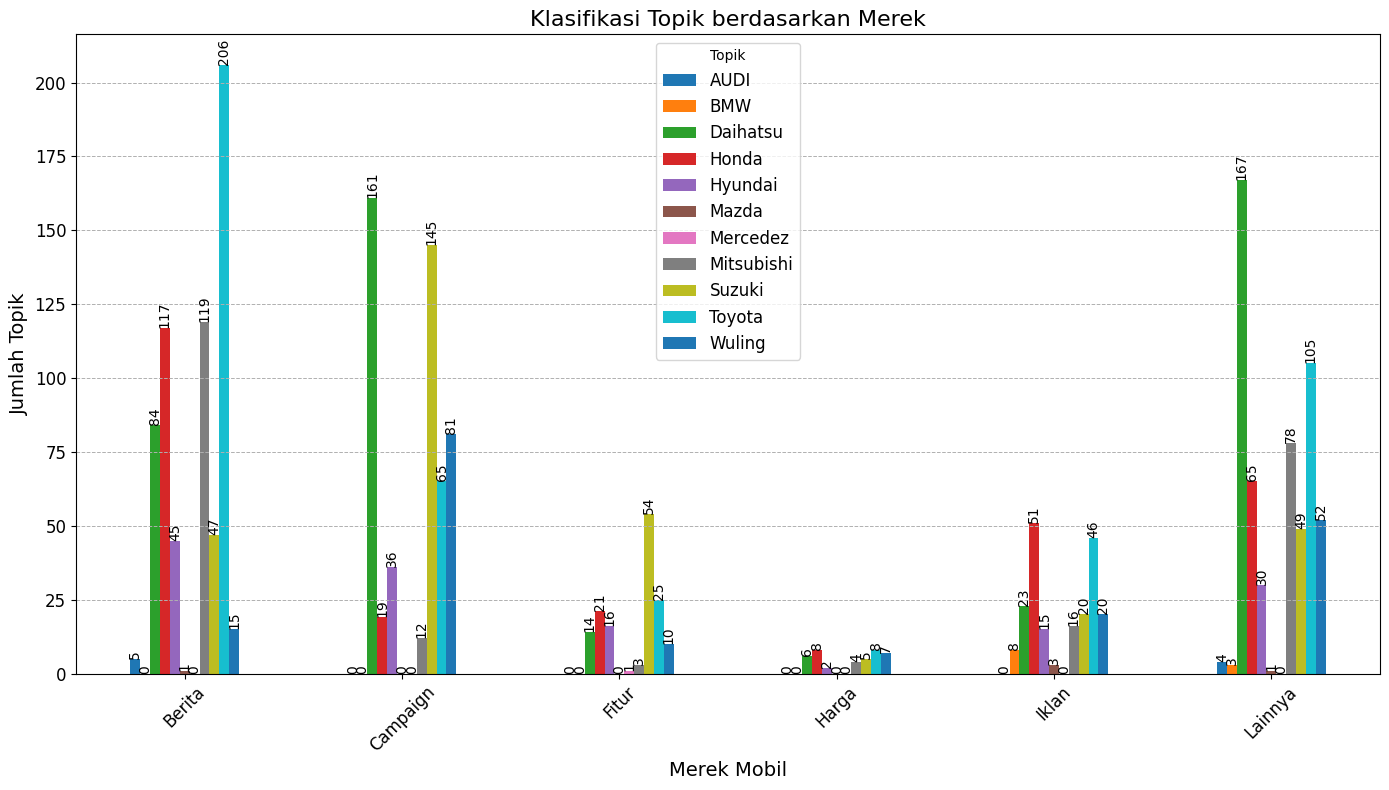

In [24]:
# Menghitung jumlah sentimen per entitas
sentiment_count = df_tweet.groupby(['Topic Classification', 'entity']).size().unstack(fill_value=0)

# Membuat plot
plt.figure(figsize=(12, 8))

# Plotting
ax = sentiment_count.plot(kind='bar', figsize=(14, 8))

plt.title('Klasifikasi Topik berdasarkan Merek', fontsize=16)
plt.xlabel('Merek Mobil', fontsize=14)
plt.ylabel('Jumlah Topik', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Topik', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Menambahkan label jumlah di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='bottom',
                fontsize=10,
                color='black',
                rotation=90)

plt.tight_layout()

# Menampilkan plot
plt.show()


1. Distribusi Topik Keseluruhan:

Toyota memiliki jumlah topik tertinggi secara keseluruhan, terutama dalam
kategori "Berita" dan "Lainnya."

Daihatsu juga memiliki jumlah topik yang signifikan dalam kategori "Campaign" dan "Lainnya."

Suzuki menunjukkan kehadiran yang kuat dalam kategori "Campaign."

2.Wawasan Berdasarkan Kategori:

Berita: Toyota, Daihatsu, dan Suzuki memiliki jumlah topik tertinggi. Ini menunjukkan bahwa merek-merek ini sering disebutkan dalam berita, mungkin karena peluncuran produk baru, pembaruan, atau acara besar.

Campaign: Daihatsu dan Suzuki mendominasi kategori ini, menunjukkan bahwa mereka aktif dalam kampanye pemasaran yang berhasil menarik perhatian.

Fitur: Suzuki memimpin dalam kategori ini, menunjukkan bahwa fitur mobil mereka sering dibicarakan dan mungkin sangat dihargai.

Harga: Jumlah topik dalam kategori ini relatif rendah di semua merek, dengan sedikit keunggulan oleh Hyundai dan Toyota, menunjukkan bahwa harga mungkin bukan topik yang paling sering dibicarakan.

Iklan: Honda dan Toyota memimpin dalam kategori ini, menunjukkan bahwa iklan mereka berhasil menarik perhatian dan menghasilkan pembicaraan.

Lainnya: Daihatsu dan Toyota memiliki jumlah topik tertinggi, menunjukkan bahwa merek-merek ini sering disebutkan dalam berbagai konteks lain yang tidak dikategorikan secara eksplisit.

3. Wawasan Berdasarkan Merek:

Toyota: Menunjukkan kehadiran yang kuat dan seimbang di semua kategori, menunjukkan bahwa Toyota adalah merek yang sering dibicarakan di berbagai konteks.

Daihatsu: Terutama kuat dalam "Campaign" dan "Lainnya," menunjukkan bahwa Daihatsu memiliki kampanye pemasaran yang efektif dan sering disebutkan dalam berbagai konteks.

Suzuki: Kuat dalam "Campaign" dan "Fitur," menunjukkan bahwa Suzuki memiliki kampanye pemasaran yang sukses dan fitur mobil mereka diterima dengan baik.

Honda: Kehadiran signifikan dalam "Berita" dan "Iklan," menunjukkan bahwa Honda sering dibicarakan dalam berita dan iklan mereka berhasil menarik perhatian.

4. Wawasan Komparatif:

Merek seperti Audi, BMW, dan Mercedes memiliki jumlah topik yang relatif lebih rendah di semua kategori, yang mungkin menunjukkan bahwa mereka kurang sering disebutkan atau kurang berdampak dalam konteks pasar mobil Jepang.

Merek seperti Hyundai menunjukkan kehadiran yang signifikan dalam beberapa kategori, namun tidak mendominasi.

In [19]:
!pip install wordcloud

<ipython-input-22-a58e128a784f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topic['stemming'] = df_topic['stemming'].astype(str)


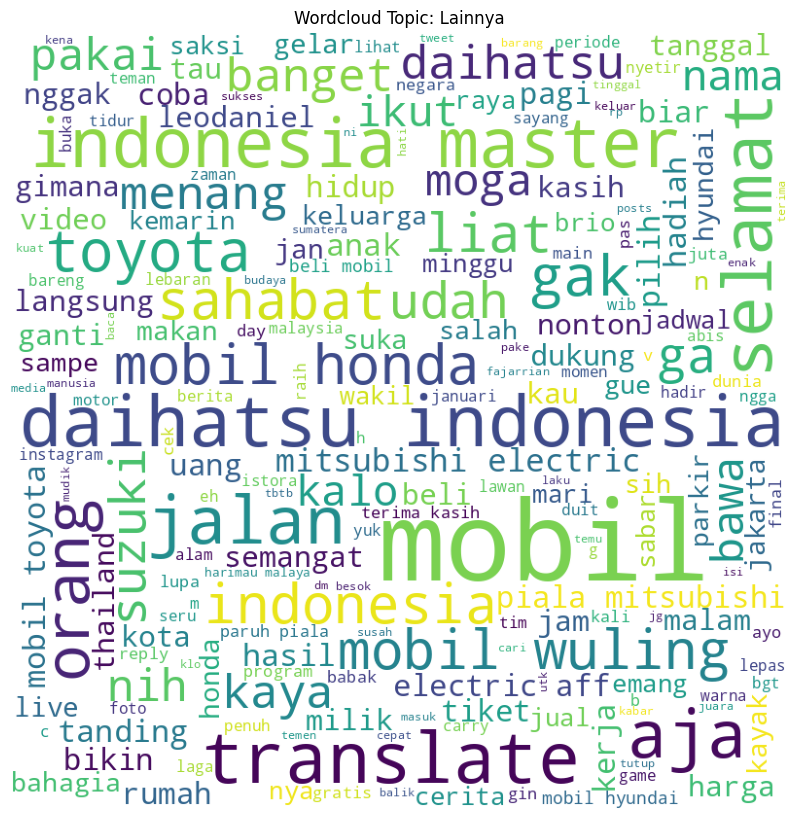

<ipython-input-22-a58e128a784f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topic['stemming'] = df_topic['stemming'].astype(str)


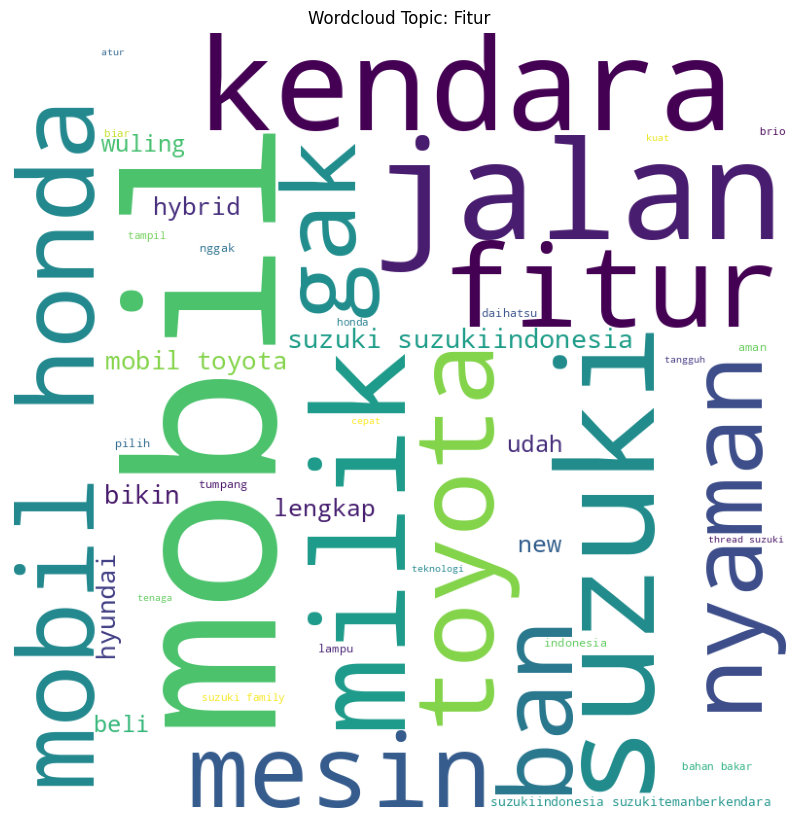

<ipython-input-22-a58e128a784f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topic['stemming'] = df_topic['stemming'].astype(str)


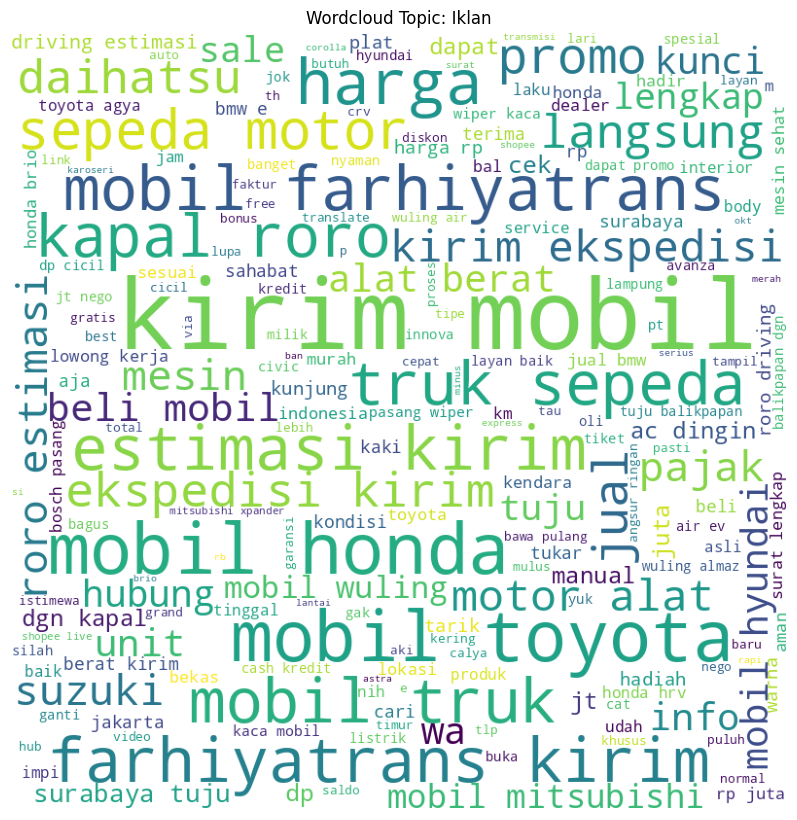

<ipython-input-22-a58e128a784f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topic['stemming'] = df_topic['stemming'].astype(str)


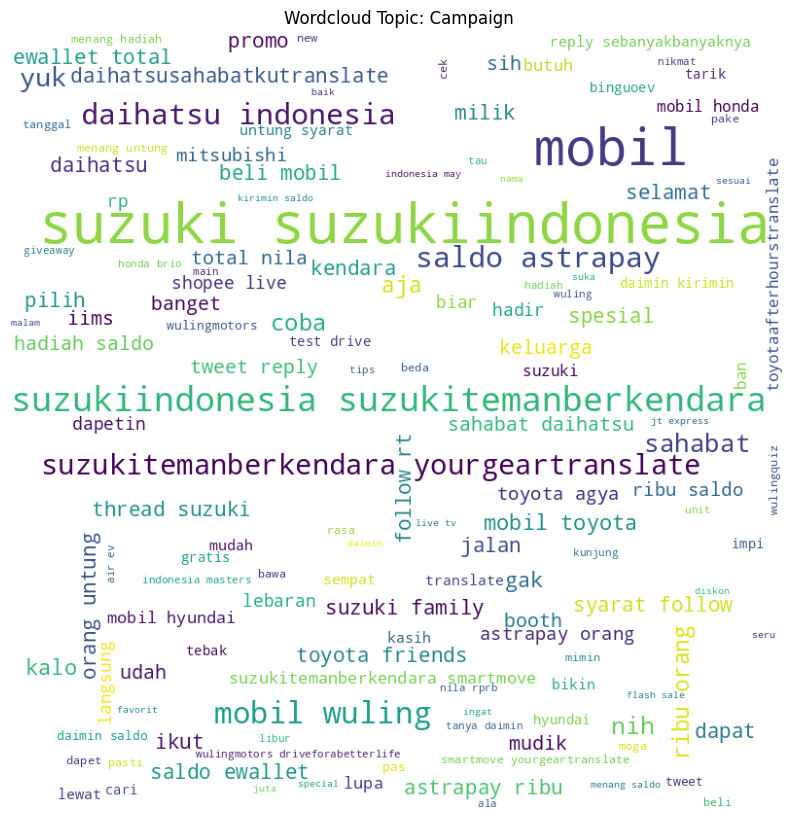

<ipython-input-22-a58e128a784f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topic['stemming'] = df_topic['stemming'].astype(str)


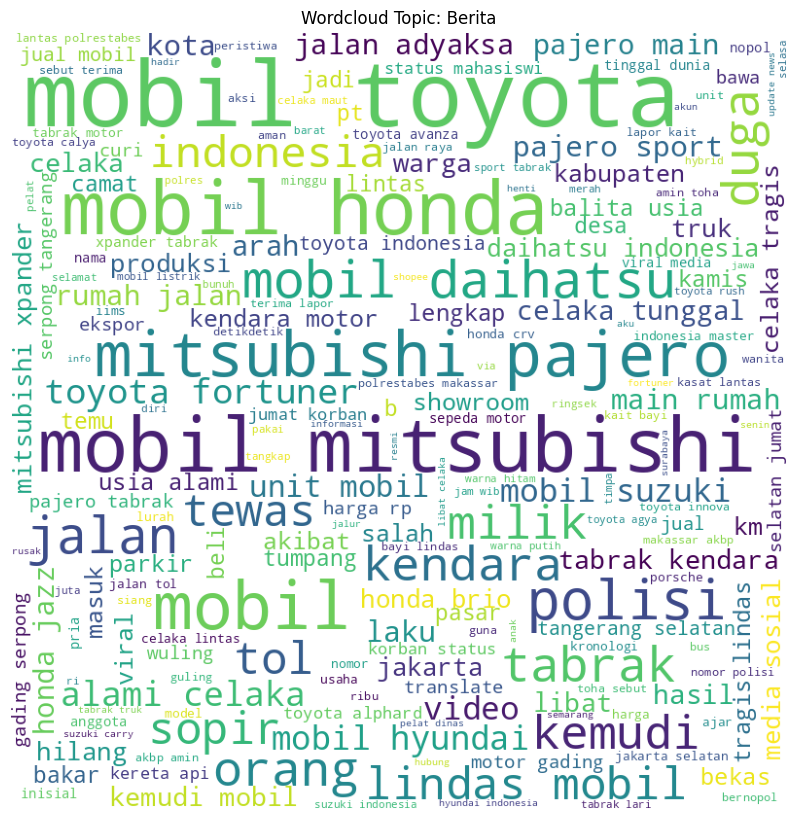

<ipython-input-22-a58e128a784f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topic['stemming'] = df_topic['stemming'].astype(str)


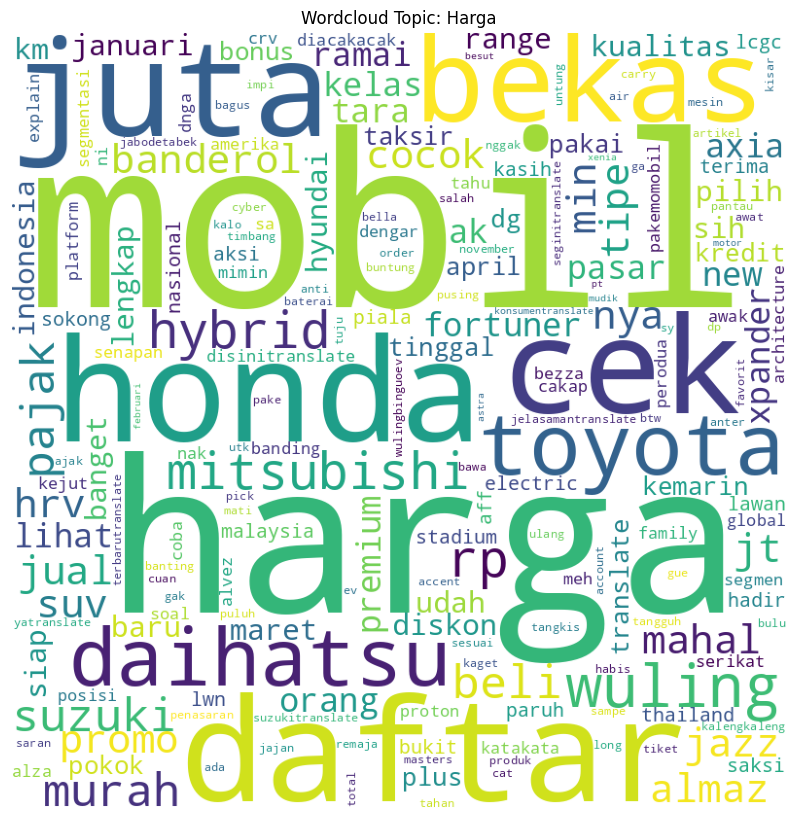

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Get unique topic classifications
topics = df_tweet['Topic Classification'].unique()

# Create wordclouds for each topic classification
for topic in topics:
    # Filter DataFrame for each topic classification
    df_topic = df_tweet[df_tweet['Topic Classification'] == topic]

    # Convert 'stemming' column to strings
    df_topic['stemming'] = df_topic['stemming'].astype(str)

    # Create text for wordcloud
    text_topic = ' '.join(df_topic['stemming']) if not df_topic.empty else None

    # Create wordcloud if text is not None
    stopwords = set(STOPWORDS)
    if text_topic:
        wordcloud_topic = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(text_topic)

        # Plot wordcloud
        plt.figure(figsize=(8, 8), facecolor=None)
        plt.imshow(wordcloud_topic)
        plt.axis("off")
        plt.title(f"Wordcloud Topic: {topic}")
        plt.tight_layout(pad=0)
        plt.show()

1. Lainnya

Merek mobil cukup sering disebutkan pada topik lainnya, tapi kata kata lainnya yang memmbuat tweet di topik ini tidak masuk ke topik berita, iklan, fitur, campaign dan harga. Karena kebanyakan kata-kata opini.

2. Fitur

kata "fitur" sangat besar, menunjukkan fokus utama diskusi pada fitur-fitur kendaraan. Kata-kata seperti "mesin," "nyaman," "ban," dan "lengkap" menunjukkan fitur-fitur spesifik yang sering dibicarakan. Ini mencakup performa mesin, kenyamanan, kualitas ban, dan kelengkapan fitur.

3. Iklan

kata-kata seperti "promo", "bonus", "diskon", dan "hadiah" menunjukkan fokus pada promosi penjualan. Istilah seperti "kredit", "gratis", dan "langsung" menunjukkan berbagai strategi dan penawaran promosi. Penggunaan kata-kata seperti "hubungi", "info", "kunci", dan "wa" (WhatsApp) menunjukkan fokus pada interaksi dan komunikasi dengan pelanggan. Kata-kata seperti "estimasi kirim", "harga", "lokasi", dan "kondisi" menyoroti aspek-aspek penting yang dipertimbangkan pelanggan saat membeli kendaraan atau menggunakan layanan pengiriman.

4. Campaign
Kata-kata seperti "promo", "hadiah", "giveaway", dan "saldo" menunjukkan fokus pada promosi dan kampanye untuk menarik pelanggan. Kata-kata seperti "coba", "pilih", "ikut", dan "syarat" menunjukkan partisipasi dan keterlibatan dalam kegiatan atau promosi yang ditawarkan.

5. Berita

Kata-kata seperti "tewas," "celaka," "tabrak," dan "lindas" menunjukkan bahwa banyak tweet tentang kecelakaan lalu lintas atau kematian yang melibatkan kendaraan. Kemunculan sering kata "jalan" dan "tol" menunjukkan bahwa insiden di jalan raya menjadi topik diskusi yang signifikan. Merek mobil tertentu seperti "Toyota," "Honda," "Mitsubishi," dan "Daihatsu" sering disebutkan, kemungkinan merek ini sering diberitakan dibandingkan yang lainnya.

6. Harga
Kata-kata seperti "harga", "daftar", "cek", "juta", dan "banderol" menunjukkan fokus pada informasi harga dan perbandingan. Penggunaan kata-kata seperti "pajak", "premium", "murah", "kualitas", dan "pilih" menunjukkan aspek-aspek penting yang dipertimbangkan pelanggan saat mengevaluasi harga kendaraan.


# **Modelling**

In [ ]:
print(df_tweet['Topic Classification'].value_counts())

Topic Classification
Berita      639
Lainnya     554
Campaign    519
Iklan       202
Fitur       144
Harga        40
Name: count, dtype: int64


In [ ]:
from sklearn.utils import resample

# Misalkan kelas dengan jumlah terbanyak adalah 'Lainnya'
majority_class = 'Lainnya'
majority_count = df_tweet[df_tweet['Topic Classification'] == majority_class].shape[0]

# Resampling untuk setiap kelas minoritas
resampled_data = [df_tweet[df_tweet['Topic Classification'] == majority_class]]

for topic in df_tweet['Topic Classification'].unique():
    if topic != majority_class:
        resampled_data.append(resample(df_tweet[df_tweet['Topic Classification'] == topic],
                                       replace=True,
                                       n_samples=majority_count,
                                       random_state=42))

# Menggabungkan kembali data resampled
data_resampled = pd.concat(resampled_data)

# Mengacak DataFrame
data_resampled = data_resampled.sample(frac=1, random_state=42)

In [ ]:
data_resampled['Topic Classification'].value_counts()

Topic Classification
Harga       554
Lainnya     554
Fitur       554
Iklan       554
Berita      554
Campaign    554
Name: count, dtype: int64

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer

In [ ]:
df_model = data_resampled[['stemming', 'Topic Classification']]
df_model.head()

,stemming,Topic Classification
1195,kisar harga mobil honda jazz bekas mati konsum...,Harga
1434,trima kasih,Lainnya
104,kombinasi atgm mobil x toyota primadona medan ...,Fitur
1145,unit mobil honda stock type nih order langsung...,Iklan
106,ganteng make bmw,Lainnya


In [ ]:
# Convert sentiment labels to numeric values
label_encoder = LabelEncoder()
df_model['Topic Classification'] = label_encoder.fit_transform(df_model['Topic Classification'])

<ipython-input-23-d9a266f09725>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Topic Classification'] = label_encoder.fit_transform(df_model['Topic Classification'])


In [ ]:
# Splitting the data into train and test sets with a ratio of 80:20
train_data, test_data = train_test_split(df_model, test_size=0.2, random_state=1507)

In [ ]:
# Define a custom dataset
class TweetDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        tokens = self.tokenizer.encode(text, add_special_tokens=True)
        return torch.tensor(tokens), torch.tensor(label)

In [ ]:
# Tokenize and create DataLoader
def collate_fn(batch):
    texts, labels = zip(*batch)
    texts_padded = pad_sequence(texts, batch_first=True, padding_value=0)
    labels = torch.tensor(labels)
    return texts_padded, labels

# Create datasets
train_dataset = TweetDataset(train_data['stemming'], train_data['Topic Classification'])
test_dataset = TweetDataset(test_data['stemming'], test_data['Topic Classification'])

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import BertTokenizer

class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size, num_layers, dropout=0.5):
        super(LSTMModel, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
# Hyperparameters
vocab_size = len(BertTokenizer.from_pretrained('bert-base-uncased').vocab)
embed_size = 256
hidden_size = 256 # Increase hidden size
output_size = len(label_encoder.classes_)
num_layers = 2  # Decrease the number of layers
dropout = 0.3  # Add dropout
num_epochs = 30  # Increase the number of epochs
learning_rate = 0.001

# Instantiate the model, loss function, and optimizer
model = LSTMModel(vocab_size, embed_size, hidden_size, output_size, num_layers, dropout)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
model.train()
for epoch in range(num_epochs):
    for texts, labels in train_loader:
        outputs = model(texts)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/30], Loss: 1.4486
Epoch [2/30], Loss: 1.4301
Epoch [3/30], Loss: 1.0832
Epoch [4/30], Loss: 1.3549
Epoch [5/30], Loss: 1.1774
Epoch [6/30], Loss: 0.8737
Epoch [7/30], Loss: 0.2375
Epoch [8/30], Loss: 0.1966
Epoch [9/30], Loss: 0.0571
Epoch [10/30], Loss: 0.0859
Epoch [11/30], Loss: 0.0270
Epoch [12/30], Loss: 0.1881
Epoch [13/30], Loss: 0.6972
Epoch [14/30], Loss: 0.0320
Epoch [15/30], Loss: 1.2386
Epoch [16/30], Loss: 0.0052
Epoch [17/30], Loss: 0.0022
Epoch [18/30], Loss: 0.0022
Epoch [19/30], Loss: 0.0582
Epoch [20/30], Loss: 0.3471
Epoch [21/30], Loss: 0.1154
Epoch [22/30], Loss: 0.0027
Epoch [23/30], Loss: 0.0504
Epoch [24/30], Loss: 0.0077
Epoch [25/30], Loss: 0.0005
Epoch [26/30], Loss: 0.0020
Epoch [27/30], Loss: 0.0941
Epoch [28/30], Loss: 0.0048
Epoch [29/30], Loss: 0.1714
Epoch [30/30], Loss: 1.7967


In [ ]:
# Assuming 'model' is your trained model and 'optimizer' is your optimizer
torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, 'sentiment_predict_model.pth')

In [ ]:
import torch.quantization

# Assuming 'model' is your trained model
quantized_model = torch.quantization.quantize_dynamic(
    model, {torch.nn.Linear}, dtype=torch.qint8
)

# Save the quantized model
torch.save(quantized_model.state_dict(), 'prediction_model.pth')

In [ ]:
# Testing the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for texts, labels in test_loader:
        outputs = model(texts)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 85.26%
